<a href="https://colab.research.google.com/github/Abdullahfoysal/Neural-Network-from-scratch/blob/main/MedicalDataClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/CNN_dataset.zip


Archive:  /content/drive/MyDrive/CNN_dataset.zip
replace __MACOSX/._CNN_dataset? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls /content/sample_data/CNN_dataset




ls: cannot access '/content/sample_data/CNN_dataset': No such file or directory


In [ ]:
import pandas as pd
import os

In [ ]:
datadir ='/content/CNN_dataset/'

In [ ]:
dir_AbdomenCT=datadir+'AbdomenCT'
dir_CXR=datadir+'CXR'
dir_ChestCT=datadir+'ChestCT'
dir_Hand=datadir+'Hand'
dir_HeadCT=datadir+'HeadCT'

In [ ]:
data=[]

In [ ]:
for filename in os.listdir(dir_AbdomenCT):
    if filename.endswith('.jpeg'):
        file_path = os.path.join(dir_AbdomenCT, filename)
        label = 'AbdomenCT'
        classIndex =0
        data.append((file_path, label,classIndex))

for filename in os.listdir(dir_CXR):
    if filename.endswith('.jpeg'):
        file_path = os.path.join(dir_CXR, filename)
        label = 'CXR'
        classIndex =1
        data.append((file_path, label,classIndex))


for filename in os.listdir(dir_ChestCT):
    if filename.endswith('.jpeg'):
        file_path = os.path.join(dir_ChestCT, filename)
        label = 'ChestCT'
        classIndex =2
        data.append((file_path, label,classIndex))

for filename in os.listdir(dir_Hand):
    if filename.endswith('.jpeg'):
        file_path = os.path.join(dir_Hand, filename)
        label = 'Hand'
        classIndex =3
        data.append((file_path, label,classIndex))


for filename in os.listdir(dir_HeadCT):
    if filename.endswith('.jpeg'):
        file_path = os.path.join(dir_HeadCT, filename)
        label = 'HeadCT'
        classIndex =4
        data.append((file_path, label,classIndex))

In [ ]:
df = pd.DataFrame(data, columns=['filepath', 'label','classIndex'])


In [ ]:
df.to_csv(datadir+'classification.csv', index=False)


In [ ]:
data = pd.read_csv(os.path.join(datadir,"classification.csv"))
pd.set_option('display.max_colwidth',-1)
data

<ipython-input-94-9984a0ea102c>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


,filepath,label,classIndex
0,/content/CNN_dataset/AbdomenCT/000377.jpeg,AbdomenCT,0
1,/content/CNN_dataset/AbdomenCT/002537.jpeg,AbdomenCT,0
2,/content/CNN_dataset/AbdomenCT/004678.jpeg,AbdomenCT,0
3,/content/CNN_dataset/AbdomenCT/001287.jpeg,AbdomenCT,0
4,/content/CNN_dataset/AbdomenCT/006209.jpeg,AbdomenCT,0
...,...,...,...
49995,/content/CNN_dataset/HeadCT/002616.jpeg,HeadCT,4
49996,/content/CNN_dataset/HeadCT/007737.jpeg,HeadCT,4
49997,/content/CNN_dataset/HeadCT/002448.jpeg,HeadCT,4
49998,/content/CNN_dataset/HeadCT/006096.jpeg,HeadCT,4


In [ ]:
shaffledata = data.sample(frac=1)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
X = shaffledata.drop('classIndex', axis=1)
y = shaffledata['classIndex']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train)

(36000, 2)
(10000, 2)
(4000, 2)
(36000,)
(10000,)
                                         filepath      label
39479  /content/CNN_dataset/Hand/004600.jpeg       Hand     
14401  /content/CNN_dataset/CXR/008109.jpeg        CXR      
3643   /content/CNN_dataset/AbdomenCT/001646.jpeg  AbdomenCT
33889  /content/CNN_dataset/Hand/005039.jpeg       Hand     
42137  /content/CNN_dataset/HeadCT/008467.jpeg     HeadCT   
...                                        ...        ...   
28977  /content/CNN_dataset/ChestCT/002766.jpeg    ChestCT  
27420  /content/CNN_dataset/ChestCT/008646.jpeg    ChestCT  
18666  /content/CNN_dataset/CXR/005301.jpeg        CXR      
46909  /content/CNN_dataset/HeadCT/000395.jpeg     HeadCT   
23822  /content/CNN_dataset/ChestCT/004507.jpeg    ChestCT  

[36000 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt
import random


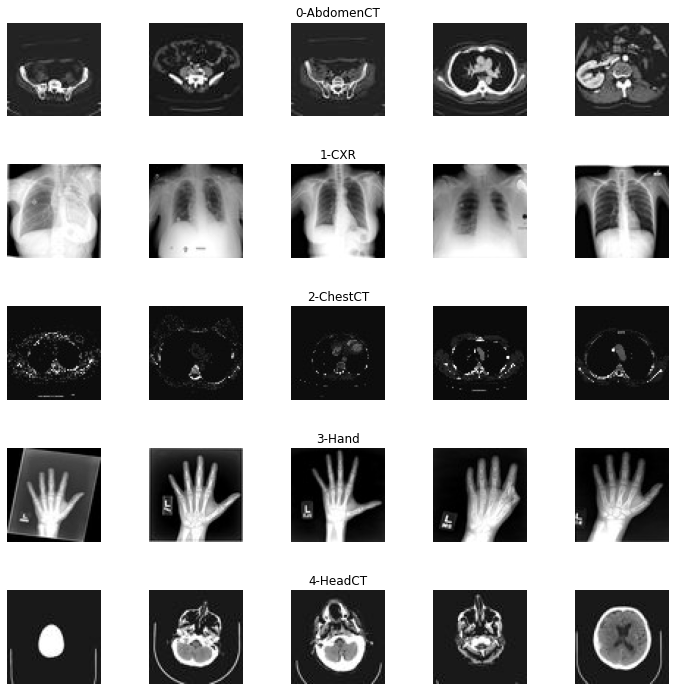

In [ ]:
data = shaffledata
cols=5
num_classes = 5
num_of_samples = []
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(10, 10))
fig.tight_layout()

for i in range(num_classes):
  x_selected = data[data['classIndex']==i]
  num_of_samples.append(len(x_selected))
  for j in range(cols):
    num_rows = len(x_selected)

    # Generate a random integer index between 0 and num_rows-1
    random_index = np.random.randint(num_rows)

    # Select a random row from the DataFrame using the random_index
    random_row = x_selected.iloc[random_index]

    # Get the filepath from the random row
    random_filepath = random_row['filepath']
    image = plt.imread(random_filepath)
    axs[i][j].imshow(image, cmap=plt.get_cmap("gray"))
    axs[i][j].axis("off")
    if j==2:
      axs[i][j].set_title(str(i)+'-'+random_row['label'])






[10000, 10000, 10000, 10000, 10000]


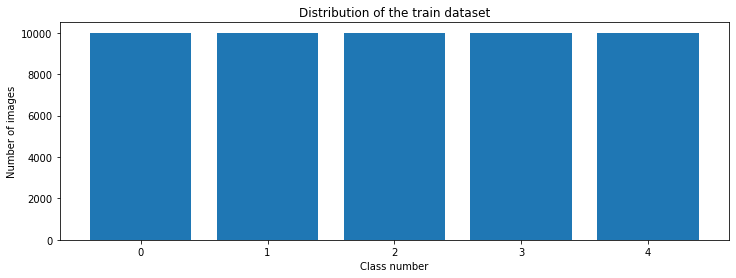

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
# Get the number of rows in the DataFrame
num_rows = len(X_train)

# Generate a random integer index between 0 and num_rows-1
random_index = np.random.randint(num_rows)

# Select a random row from the DataFrame using the random_index
random_row = X_train.iloc[random_index]

# Get the filepath from the random row
random_filepath = random_row['filepath']
random_filepath

'/content/CNN_dataset/ChestCT/001272.jpeg'

In [ ]:
def getRandomImagePathFromTrainData():
  # Get the number of rows in the DataFrame
  num_rows = len(X_train)

  # Generate a random integer index between 0 and num_rows-1
  random_index = np.random.randint(num_rows)

  # Select a random row from the DataFrame using the random_index
  random_row = X_train.iloc[random_index]

  # Get the filepath from the random row
  random_filepath = random_row['filepath']
  return random_filepath

(64, 64)


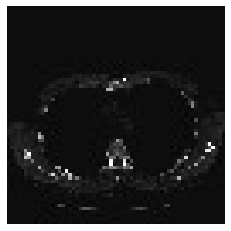

In [ ]:
###PRE-PROCESSING-IMAGE###
def grayscale(img):
  img =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img


origin_img = getRandomImagePathFromTrainData()
img = cv2.imread(origin_img)
img = grayscale(img)
plt.imshow(img,cmap =plt.get_cmap("gray"))
plt.axis("off")
print(img.shape)


(64, 64)


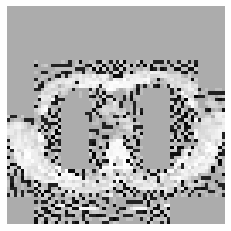

In [ ]:
###PRE-PROCESSING-IMAGE###
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

#img = getRandomImagePathFromTrainData()
img = cv2.imread(origin_img)
img = grayscale(img)
img =equalize(img)
plt.imshow(img,cmap =plt.get_cmap("gray"))
plt.axis("off")
print(img.shape)



In [ ]:
def preprocessing(img):
  img = cv2.imread(img)
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img







X_train = np.array(list(map(preprocessing,X_train['filepath'])))
X_test = np.array(list(map(preprocessing,X_test['filepath'])))
X_valid = np.array(list(map(preprocessing,X_valid['filepath'])))


(36000, 64, 64)


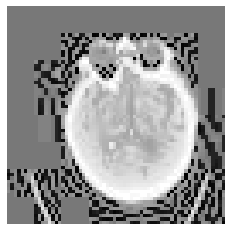

In [ ]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)],cmap =plt.get_cmap("gray"))
plt.axis("off")
print(X_train.shape)

In [ ]:
X_train = X_train.reshape(36000, 64, 64,1)
X_test = X_test.reshape(10000, 64, 64,1)
X_valid =X_valid.reshape(4000,64,64,1)

In [ ]:
X_train.shape
X_valid.shape

(4000, 64, 64, 1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range = 0.1,
                   height_shift_range=0.1,
                   zoom_range=0.2,
                   shear_range =0.1 ,
                   rotation_range=10)

datagen.fit(X_train)

(25, 64, 64, 1)


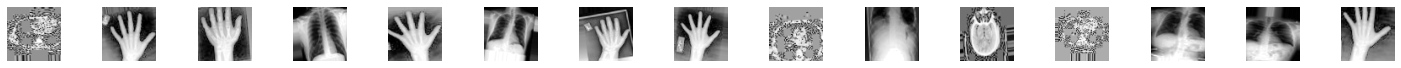

In [ ]:
batches = datagen.flow(X_train,y_train,batch_size=25)
X_batch,y_batch = next(batches)
print(X_batch.shape)

fig,axs = plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(64,64),cmap =plt.get_cmap("gray"))
  axs[i].axis('off')

In [ ]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout


In [ ]:

y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)
y_valid = to_categorical(y_valid,num_classes)

In [ ]:
def modified_model():
  model =Sequential()
  model.add(Conv2D(60,(5,5),input_shape=(64,64,1),activation='relu'))
  model.add(Conv2D(60,(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(30,(3,3),activation='relu'))  
  model.add(Conv2D(30,(3,3),activation='relu'))  
  model.add(MaxPooling2D(pool_size=(2,2)))
  #model.add(Dropout(0.5)) 

  model.add(Flatten()) 
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  #compile model
  model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model = modified_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 60, 60, 60)        1560      
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 60)        90060     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 60)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 30)        16230     
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 30)        8130      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                  

In [ ]:
history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=50),steps_per_epoch = 50,epochs=10,validation_data=(X_valid,y_valid),shuffle =True)

Epoch 1/10


<ipython-input-117-b5a6700828cc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=50),steps_per_epoch = 50,epochs=10,validation_data=(X_valid,y_valid),shuffle =True)


50/50 [==============================] - 250s 5s/step - loss: 0.2490 - accuracy: 0.9072 - val_loss: 0.1514 - val_accuracy: 0.9438
Epoch 2/10
50/50 [==============================] - 252s 5s/step - loss: 0.2539 - accuracy: 0.9248 - val_loss: 0.0873 - val_accuracy: 0.9728
Epoch 3/10
50/50 [==============================] - 252s 5s/step - loss: 0.1331 - accuracy: 0.9568 - val_loss: 0.2781 - val_accuracy: 0.8935
Epoch 4/10
50/50 [==============================] - 255s 5s/step - loss: 0.1202 - accuracy: 0.9568 - val_loss: 0.6299 - val_accuracy: 0.8213
Epoch 5/10
50/50 [==============================] - 253s 5s/step - loss: 0.1186 - accuracy: 0.9604 - val_loss: 0.0261 - val_accuracy: 0.9923
Epoch 6/10
50/50 [==============================] - 253s 5s/step - loss: 0.0823 - accuracy: 0.9660 - val_loss: 0.3308 - val_accuracy: 0.8875
Epoch 7/10
50/50 [==============================] - 238s 5s/step - loss: 0.0915 - accuracy: 0.9708 - val_loss: 0.1517 - val_accuracy: 0.9433
Epoch 8/10
50/50 [======

Text(0.5, 0, 'epoch')

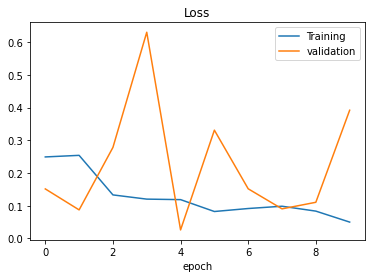

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','validation'])
plt.title("Loss")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

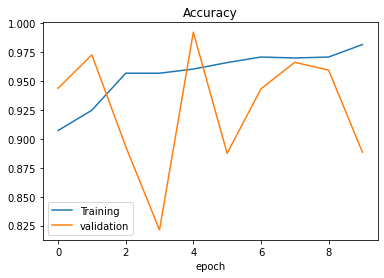

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','validation'])
plt.title("Accuracy")
plt.xlabel("epoch")

In [ ]:
score = model.evaluate(X_test,y_test,verbose =0)
print('Test Score:',score[0])
print("Test Accuracy: ",score[1])

Test Score: 0.3595622181892395
Test Accuracy:  0.8999000191688538


<PIL.JpegImagePlugin.JpegImageFile image mode=L size=630x630 at 0x7F68AB68EA00>


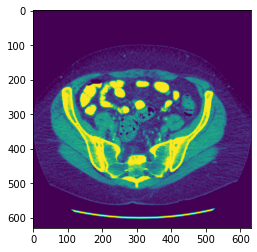

In [ ]:

#fetch image
 
import requests
from PIL import Image
url = 'https://prod-images-static.radiopaedia.org/images/12503906/03c363e609242b3c4f5ff786b6ec58_big_gallery.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img)
print(img)

(64, 64)


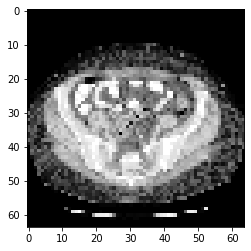

In [ ]:
#Preprocess image
def preprocessingImage(img):
  #img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

img = np.asarray(img)
img = cv2.resize(img, (64,64))
img = preprocessingImage(img)
plt.imshow(img,cmap =plt.get_cmap("gray"))
print(img.shape)
 

In [ ]:
#Test image
img = img.reshape(1,64,64,1)
predict_x=model.predict(img) 
prediction=np.argmax(predict_x,axis=1)
x_selected = data[data['classIndex']==prediction[0]]
print("prediction image: ",str(prediction))
print(x_selected)

1/1 [==============================] - 0s 41ms/step
prediction image:  [0]
                                        filepath      label  classIndex
3339  /content/CNN_dataset/AbdomenCT/003383.jpeg  AbdomenCT  0         
2948  /content/CNN_dataset/AbdomenCT/002188.jpeg  AbdomenCT  0         
251   /content/CNN_dataset/AbdomenCT/005585.jpeg  AbdomenCT  0         
7962  /content/CNN_dataset/AbdomenCT/001878.jpeg  AbdomenCT  0         
5914  /content/CNN_dataset/AbdomenCT/004989.jpeg  AbdomenCT  0         
...                                          ...        ... ..         
8053  /content/CNN_dataset/AbdomenCT/006759.jpeg  AbdomenCT  0         
6298  /content/CNN_dataset/AbdomenCT/004642.jpeg  AbdomenCT  0         
6472  /content/CNN_dataset/AbdomenCT/000440.jpeg  AbdomenCT  0         
6490  /content/CNN_dataset/AbdomenCT/006510.jpeg  AbdomenCT  0         
6514  /content/CNN_dataset/AbdomenCT/000428.jpeg  AbdomenCT  0         

[10000 rows x 3 columns]


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=618x800 at 0x7F68B4176A60>


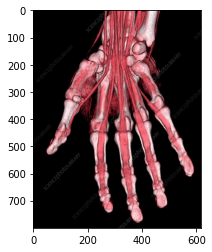

In [ ]:

url = 'https://media.sciencephoto.com/image/c0353581/800wm/C0353581-Hand,_CT_scan.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img)
print(img)

(64, 64)


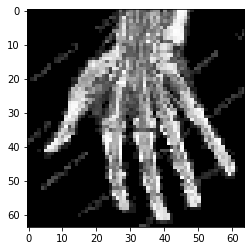

In [ ]:
#Preprocess image
def preprocessingImage2(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

img = np.asarray(img)
img = cv2.resize(img, (64,64))
img = preprocessingImage2(img)
plt.imshow(img,cmap =plt.get_cmap("gray"))
print(img.shape)
 

In [ ]:
#Test image
img = img.reshape(1,64,64,1)
predict_x=model.predict(img) 
prediction=np.argmax(predict_x,axis=1)
x_selected = data[data['classIndex']==prediction[0]]
print("prediction image: ",str(prediction))
print(x_selected)

1/1 [==============================] - 0s 39ms/step
prediction image:  [3]
                                    filepath label  classIndex
30606  /content/CNN_dataset/Hand/003012.jpeg  Hand  3         
33316  /content/CNN_dataset/Hand/007095.jpeg  Hand  3         
34879  /content/CNN_dataset/Hand/003618.jpeg  Hand  3         
35537  /content/CNN_dataset/Hand/003672.jpeg  Hand  3         
31059  /content/CNN_dataset/Hand/009973.jpeg  Hand  3         
...                                      ...   ... ..         
31454  /content/CNN_dataset/Hand/007307.jpeg  Hand  3         
36574  /content/CNN_dataset/Hand/002551.jpeg  Hand  3         
32135  /content/CNN_dataset/Hand/001193.jpeg  Hand  3         
37567  /content/CNN_dataset/Hand/001258.jpeg  Hand  3         
33198  /content/CNN_dataset/Hand/001642.jpeg  Hand  3         

[10000 rows x 3 columns]
